In [33]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import matplotlib as mpl
import numpy as np # Multi-dimensional arrays
import sap # To create morphological trees

# Pattern Spectra (PS)

![](img/ps.svg)

## 0. Setup: Load the DSM tile and compute the max-tree

- Load the dsm tile `tile_path`.
- Compute the max-tree.

In [34]:
# Your turn!
# Load DSM 
tile_path = Path('img_data/dsm_vox_50cm_tile_-12_0.tif')
image = rio.open(tile_path)
dsm = image.read(1)

# Compute Max Tree
max_tree = sap.MaxTree(dsm)

## 1. Compute attributes and visualize the distrbution of values

- Compute the `area` and `compactness` attributes
- How can we visualize the distribution of values? Display the distribution of areas, then compactness.
    + Tip: you can some matplotlib functions to plot the visualizations!

In [35]:
# Your turn!

# compute the area and compactness attributes
area = max_tree.get_attribute('area')
compactness = max_tree.get_attribute('compactness')

C:\Users\rufai\anaconda3\envs\graph\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Area Distribution'), Text(0, 0.5, 'Frequency')]

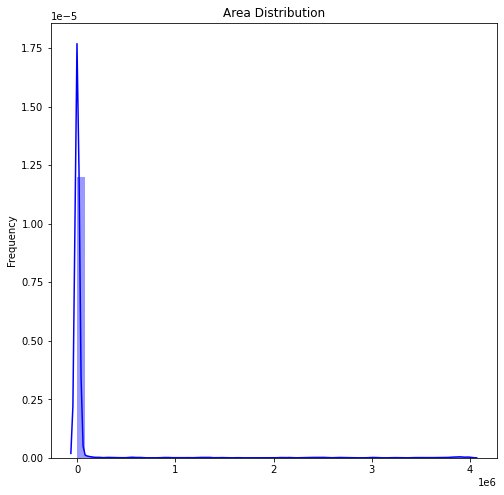

In [36]:
import seaborn as sns 
#plt.hist(x, bins= 30)
plt.figure(figsize=(8, 8))
sns.distplot(area, color='blue')
plt.gca().set(title='Area Distribution', ylabel='Frequency')

C:\Users\rufai\anaconda3\envs\graph\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rufai\anaconda3\envs\graph\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Compactness')

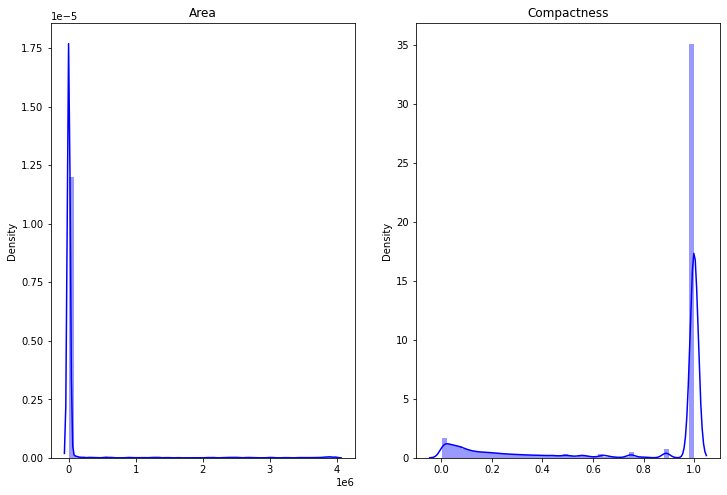

In [37]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
sns.distplot(area, color='blue')
#plt.hist(area)
plt.title('Area')

plt.subplot(122)
sns.distplot(compactness, color='blue')
#plt.hist(compactness)
plt.title('Compactness')



# 2. Compute a Pattern Spectrum

The pattern spectrum can be seen as nodes attributes probability distribution: for a given attribute value we display the probability to have nodes with these properties in the image.

To compute the Pattern Spectrum, you need to weight the histograms with the area of the flat zone times the height diffence of the flat zone and its direct ancester.

- Compute and display the Pattern Spectrum
    - For `area` attributes
    - For `compactness` attributes

C:\Users\rufai\anaconda3\envs\graph\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  


Text(0, 0.5, 'Frequency')

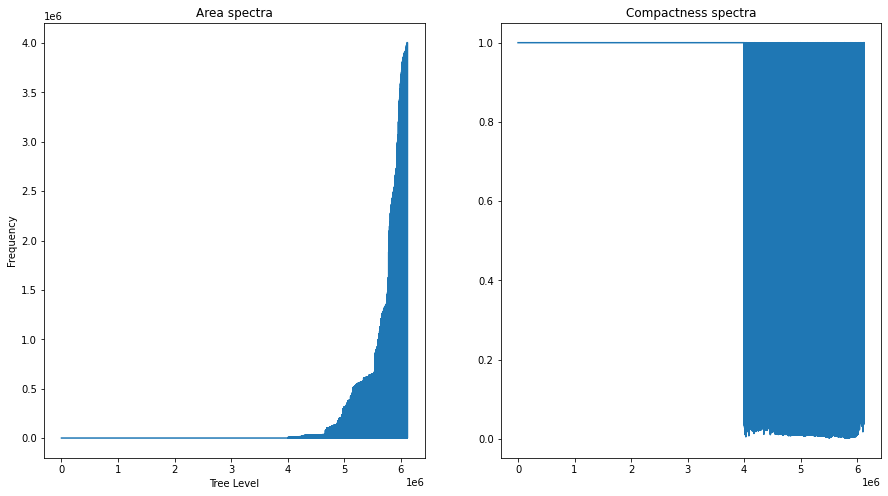

In [38]:
# Your turn!
# the probabilty to have nodes with a particular attribute
# weight the histograms with the area of the flat zone and height difference of the flat zone and its direct ancestor

figure, axs = plt.subplots(1, 2, figsize=(15, 8))
figure.add_axes(xlabel ='Tree Level', ylabel= 'Frequency')

axs[0].plot(area)
axs[0].set_title('Area spectra')
axs[0].set_xlabel('Tree Level')
axs[0].set_ylabel('Frequency')

axs[1].plot(compactness)
axs[1].set_title('Compactness spectra')
axs[0].set_xlabel('Tree Level')
axs[0].set_ylabel('Frequency')

## 3. Compute and display a 2D Pattern Spectrum with SAP

- Compute a 2D PS with SAP
- Find object of interrest in the spectrum
- Filter the DSM according to the object of interest in the spectum

Text(0.5, 1.0, 'Normalized Pattern spectrum of area versus compactness of DSM: MaxTree')

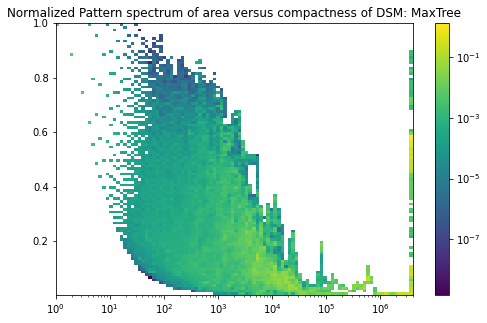

In [49]:
# Your turn!

# compute a 2D Pattern Spectrum 
plt.figure(figsize=(8, 5))
pattern_spectrum = sap.spectrum2d(
                        max_tree, 
                        'area', 
                        'compactness', 
                        x_log=True, 
                        weighted=True, 
                        normalized = True
                        )
                        
sap.show_spectrum(*pattern_spectrum, log_scale=True)
plt.colorbar()
plt.xlabel='Area'
plt.ylabel='Compactness'
plt.title('Normalized Pattern spectrum of area versus compactness of DSM: MaxTree')

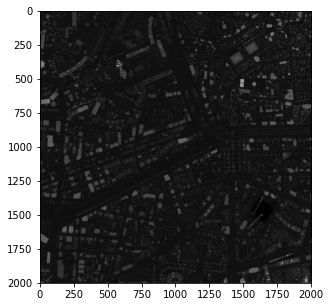

In [69]:
# find an object of interest in the spectrum and filter the DSM according to the object 
# of interest in the spectrum

# select objects in the 3rd node of the tree based on object compactness threshold
plt.figure(figsize=(8, 5))
plt.imshow(max_tree.reconstruct(compactness<0.4), cmap='gray')
plt.show()

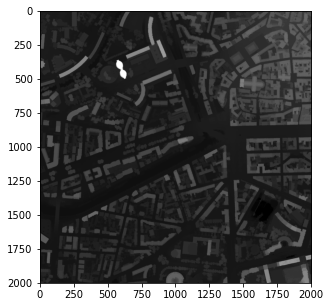

In [73]:
# select objects in the 3rd node of the tree based on object area threshold
plt.figure(figsize=(8, 5))
plt.imshow(max_tree.reconstruct(area<1000), cmap='gray')
plt.show()